In [82]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

## Training Image Preprocessing

In [86]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False, 
    
)

Found 3766 files belonging to 2 classes.


### Validation Image Preprocessing

In [89]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False, 
)

Found 3766 files belonging to 2 classes.


In [90]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

### test if model is picking data

In [92]:
for x,y in training_set:
 print(x)
 print(y)
 break

tf.Tensor(
[[[[ 53.5   97.5   34.5 ]
   [ 54.75  98.75  39.25]
   [ 63.75 106.75  52.25]
   ...
   [ 84.75 124.25  76.75]
   [ 92.5  127.    89.5 ]
   [108.25 139.25 107.75]]

  [[ 43.5   87.5   28.  ]
   [ 64.75 108.75  48.25]
   [ 81.   124.    68.5 ]
   ...
   [ 92.25 131.75  84.25]
   [100.   134.5   97.  ]
   [134.5  165.5  134.  ]]

  [[ 62.5  107.25  42.75]
   [ 52.5   96.5   35.  ]
   [ 54.75  98.    41.25]
   ...
   [110.25 149.5  102.75]
   [103.5  138.   100.  ]
   [107.5  138.5  106.  ]]

  ...

  [[104.   145.    79.  ]
   [ 86.5  127.5   59.5 ]
   [ 82.5  123.5   53.5 ]
   ...
   [104.5  141.5   87.5 ]
   [120.75 157.75 103.75]
   [ 89.5  126.5   74.5 ]]

  [[100.   141.    75.  ]
   [ 83.75 124.75  56.75]
   [ 85.5  126.5   56.5 ]
   ...
   [ 93.75 130.75  76.75]
   [107.   144.    90.  ]
   [112.75 149.75  97.75]]

  [[ 90.75 131.75  65.75]
   [ 83.5  124.5   56.5 ]
   [ 82.75 123.75  53.75]
   ...
   [ 98.5  135.5   81.5 ]
   [ 88.   125.    71.  ]
   [114.75 151.75  9

### To Avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There maybe a chance of underfitting so increase the number of neurons
3. Add more convolution layer to extract more feature from image 

### Building Model

In [95]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [98]:
model = Sequential()

## building Convolution Layer

In [100]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2))

In [101]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2))

In [102]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2))

In [104]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2))

In [105]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2)) 

In [107]:
model.add(Dropout(0.25)) # to avoid overfitting

In [108]:
model.add(Flatten())

In [109]:
model.add(Dense(units=1500,activation='relu'))

In [111]:
model.add(Dropout(0.3)) 

## output Layer


In [132]:
model.add(Dense(units=2,activation='softmax'))

## compiling Model

In [135]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [137]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 14)                  │          21,014 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │              30 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 7,806,768 (29.78 MB)

 Trainable params: 7,806,768 (29.78 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [139]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 547s 4s/step - accuracy: 0.8376 - loss: 0.5377 - val_accuracy: 0.9780 - val_loss: 0.4540
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 547s 5s/step - accuracy: 0.9740 - loss: 0.4536 - val_accuracy: 0.9883 - val_loss: 0.4381
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 510s 4s/step - accuracy: 0.9937 - loss: 0.4336 - val_accuracy: 0.9973 - val_loss: 0.4222
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 532s 5s/step - accuracy: 0.9963 - loss: 0.4215 - val_accuracy: 0.9915 - val_loss: 0.4181
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 524s 4s/step - accuracy: 0.9725 - loss: 0.4300 - val_accuracy: 0.9960 - val_loss: 0.4063
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 517s 4s/step - accuracy: 0.9868 - loss: 0.4126 - val_accuracy: 0.9987 - val_loss: 0.3964
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 505s 4s/step - accuracy: 0.9980 - loss: 0.3959 - val_accuracy: 0.9987 - val_loss: 0.3883
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 328s 3s/step - accuracy: 0.9982 - loss: 0.3868 - val_accu

### Model Evaluation

### Model Evaluation on training set

In [143]:
train_loss,train_acc = model.evaluate(training_set)

118/118 ━━━━━━━━━━━━━━━━━━━━ 118s 999ms/step - accuracy: 0.9984 - loss: 0.3657


In [144]:
print(train_loss,train_acc)

0.3655773997306824 0.9986723065376282


In [145]:
val_loss,val_acc = model.evaluate(validation_set)

118/118 ━━━━━━━━━━━━━━━━━━━━ 116s 979ms/step - accuracy: 0.9984 - loss: 0.3664


In [146]:
print(val_loss,val_acc)

0.36557742953300476 0.9986723065376282


### Saving Model

In [148]:
model.save("trained_model.keras")

In [149]:
training_history.history['val_accuracy']

[0.9779607057571411,
 0.988316535949707,
 0.9973446726799011,
 0.9915029406547546,
 0.9960169792175293,
 0.9986723065376282,
 0.9986723065376282,
 0.9986723065376282,
 0.9986723065376282,
 0.9986723065376282]

### Accuracy Visualization

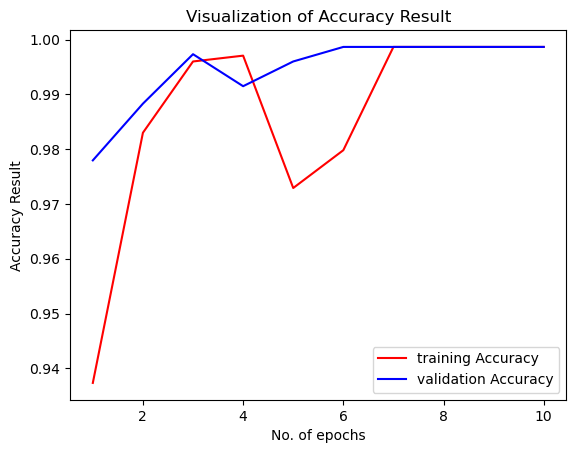

In [151]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='validation Accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metric for model evaluation

In [153]:
class_name = validation_set.class_names
class_name

['Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy']

In [154]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False, 
)

Found 3766 files belonging to 2 classes.


In [155]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

118/118 ━━━━━━━━━━━━━━━━━━━━ 113s 954ms/step


(array([[0.6595629 , 0.3404371 ],
        [0.6595629 , 0.3404371 ],
        [0.6595629 , 0.3404371 ],
        ...,
        [0.26746404, 0.7325359 ],
        [0.26746404, 0.7325359 ],
        [0.26746404, 0.7325359 ]], dtype=float32),
 (3766, 2))